# Classification



## Introducion



In this homework, we're trying to achive some new knowledge about Classification. Classification in Statistical context is the act of Classifing a dataset to some predefined clusters, for example we know that we wanna split our dataset to two subdatasets or clusters, then we'll use some algo and methods to achieve this goal.

## Load and Cleanse Your Data

* First of all, we need to load data from our dataset and do some EDA on it. try to load data from the file you were given and then, Study your dataset. Describe dataset columns, find count of null rows and then report percentage of rows containing at least one null value, drop the cells or set a default for each column on your own. You can use mixed strategies to get better performanace too (bonus). Plot some charts to describe the dataset main features and guess what features will be more valueable for us. 

* Attention: You need to use your own creativity and search skills to prune and cleanse your dataset to achieve better results on next parts. Usually what is done in this part is Removing redundant rows, Replacing missed values with some new values such as mean of the column or a default value. Running some basic statistical measures on columns such as mean or variance to get sense about dataset and also normalizing some columns, you can use **Min Max Normalization** and **Gaussian Normalization**. for more information check links bellow. A critical task that must be done in EDA is plotting. Try to plot what you need. don't forget, NUMBERS CAN'T TALK!


1.   [Min-max normalization](https://www.codecademy.com/articles/normalization#:~:text=Min%2Dmax%20normalization%20is%20one,decimal%20between%200%20and%201.&text=That%20data%20is%20just%20as%20squished%20as%20before!)
2.   [what, why and how of feature scaling-normalization & standardization](https://towardsdatascience.com/clearly-explained-what-why-and-how-of-feature-scaling-normalization-standardization-e9207042d971)
3. [Data Normalization in Data Mining](https://www.geeksforgeeks.org/data-normalization-in-data-mining/)


* You have to split your dataset into train and test and be careful, DON'T TOUCH YOUR TEST DATASET

In [1]:
# requirements
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

In [2]:
# load data
data = pd.read_csv("dataset.csv")

In [3]:
# number of rows and columns
number_of_rows, number_of_cols = data.shape
print("Number of rows:", number_of_rows)
print("Number of columns:", number_of_cols)

Number of rows: 10000
Number of columns: 14


In [4]:
# number and percentage of rows with NULL values
null_counter = 0
for i in range(number_of_rows):
    if data.loc[i, :].isnull().sum() > 0:
        print("Row", i, "includes NULL value!")
        null_counter += 1
print("Number of rows with NULL value:", null_counter)
print("Percentage of rows with at least one NULL value:", null_counter * 100 / number_of_rows, "%")

Number of rows with NULL value: 0
Percentage of rows with at least one NULL value: 0.0 %


In [5]:
# column types
data.dtypes
# for more details uncomment the line below
# data.info()

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# dropping unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = "columns")
# data.head(5)

In [7]:
# column normalization
def normalize(df, excpt):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name not in excpt:
            if df[feature_name].dtype == np.int64 or df[feature_name].dtype == np.float64:
                mean_value = df[feature_name].mean()
                sd_value = df[feature_name].std()
                result[feature_name] = (df[feature_name] - mean_value) / sd_value
    return result


data = normalize(data, excpt={'Exited', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'})

In [8]:
# non_number column replacement

# Gender column
gender = {'Male': 1,'Female': 0}
data.Gender = [gender[item] for item in data.Gender]

# Geography column
geography = {}
index = 0
for country in data['Geography'].unique():
    geography[country] = index
    index += 1
data.Geography = [geography[item] for item in data.Geography]

In [9]:
# Now let's check column types again
data.dtypes

CreditScore        float64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# replacing rows with empty cells
non_number_columns = {'Gender', 'Geography'}
for feature_name in data.columns:
    if feature_name not in non_number_columns: 
        # columns with int or float type <- mean(col)
        data[feature_name].fillna(data[feature_name].mean(), inplace = True)
    else: 
        # columns with non int or float types that have been replaced with numbers <- mode(col)
        data[feature_name].fillna(data[feature_name].mode(), inplace = True)

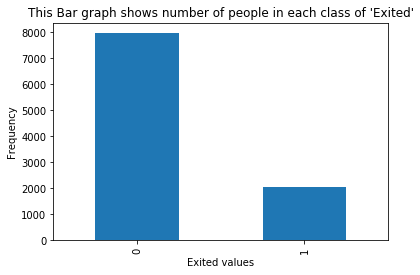

In [11]:
# data visualization(bar chart)
ValueCounts = data['Exited'].value_counts()
ax = ValueCounts.plot(kind='bar')
ax.set_xlabel("Exited values")      
ax.set_ylabel("Frequency")
ax.set_title( 'This Bar graph shows number of people in each class of \'Exited\'')
plt.show()

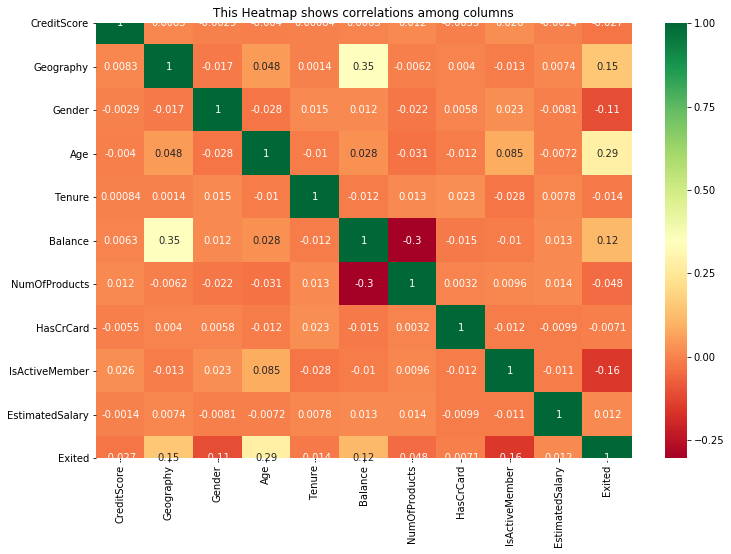

In [13]:
# data visualization(Heat map)
plt.figure(figsize=(12,8))  
plt.title('This Heatmap shows correlations among columns')
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

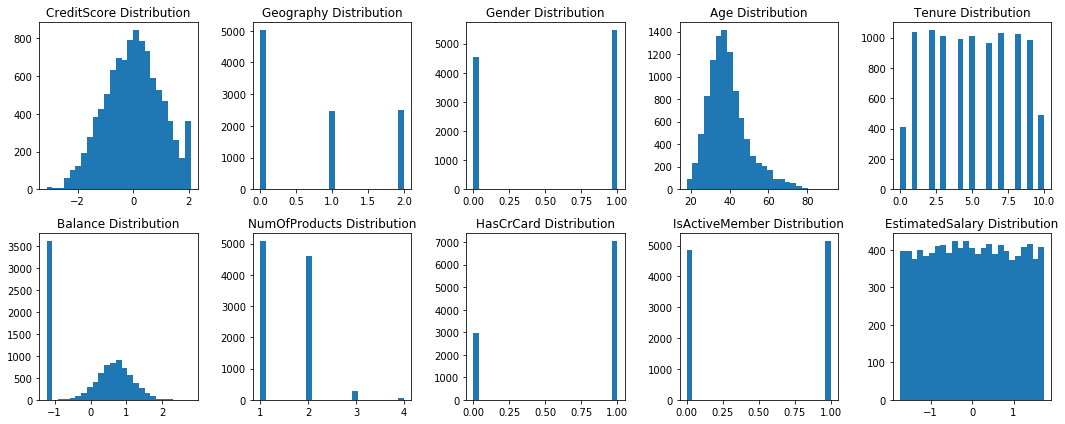

In [14]:
# visualization of all features' distribution
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, ax in enumerate(axes.flatten()):
    ax.hist(data[features[i]], bins=25)
    ax.set_title(str(features[i]) + ' Distribution')
plt.tight_layout()

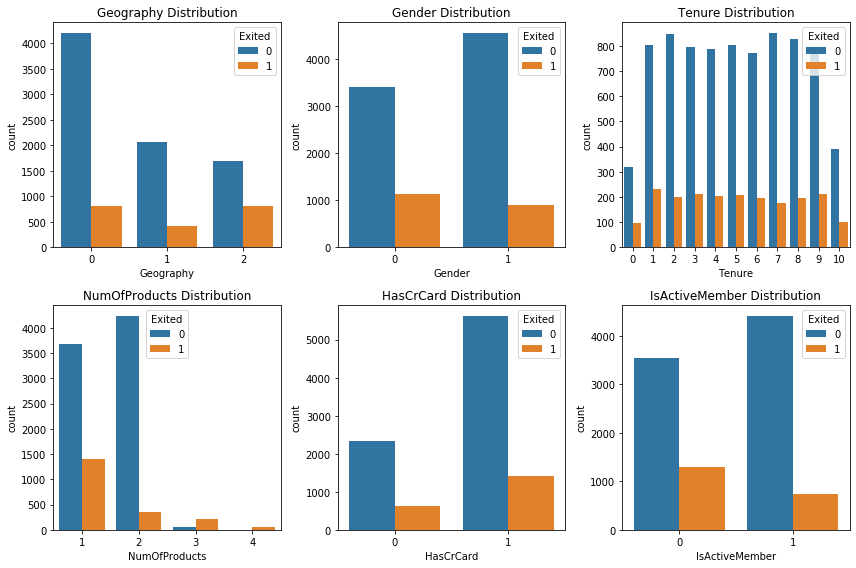

In [15]:
# visualisation
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    c = i % 3
    r = i // 3
    sns.countplot(ax=axes[r, c], x=features[i], hue="Exited", data=data)
    ax.set_title(str(features[i]) + ' Distribution')
plt.tight_layout()

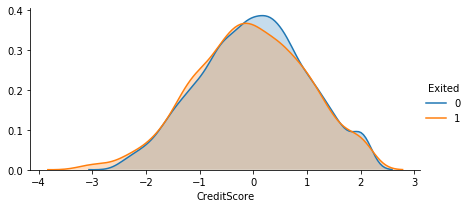

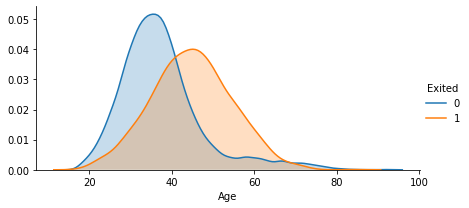

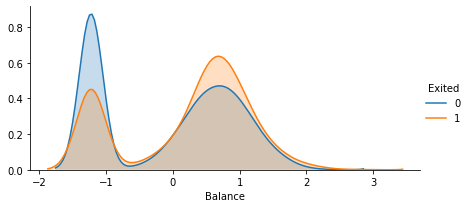

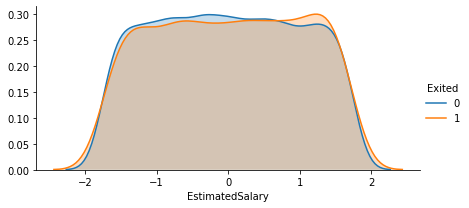

In [16]:
# visualisation
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for f in features:
    facet = sns.FacetGrid(data, hue="Exited", aspect=2)
    facet.map(sns.kdeplot, f, shade= True)
    facet.add_legend()
plt.show()

In [17]:
# dataset division(test set:0.2, train set:0.8)
training_set = data.sample(frac=0.8)
test_set = data.drop(training_set.index)

X_train = training_set.loc[:, training_set.columns != 'Exited']
y_train = training_set.loc[:, training_set.columns == 'Exited']
X_test = test_set.loc[:, test_set.columns != 'Exited']
y_test = test_set.loc[:, test_set.columns == 'Exited']

## Evalution Metrics

To see how you perfomed you need to use some evaluation. For this part you need to use f1_score, recall and precision to check how well your model has perfomed. Feel free to use any library. (we recommend you to use sklearn) 

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def evaluation(y_test, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {}'.format(precision_score(y_test, y_pred)))
    print('Recall: {}'.format(recall_score(y_test, y_pred)))
    print('F1_score: {}'.format(f1_score(y_test, y_pred)))

## Naive Bayes

Now we're going to run some classification methods on our dataset. In this part, you must implement naive bayes classifier from scratch and run it on your train dataset. Describe what you've done in a short paragraph. 

*  You need to implement naive bayes model to predict the target value. 
*  You are not allowed to use libraries and have to implement from scratch

In [19]:
def classifier(dataset):
    return {0: dataset[dataset['Exited'] == 0], 1: dataset[dataset['Exited'] == 1]}

def mean_std_calc(dataset):
    mean_std_per_col = []
    for feature in dataset.columns:
        col_data = dataset[feature]
        mean_std_per_col.append((np.mean(col_data), np.std(col_data)))
    del mean_std_per_col[-1]
    return mean_std_per_col


def get_mean_std_info(dataset):
    classes = classifier(dataset)
    info = {}
    for classValue, instances in classes.items():
        info[classValue] = mean_std_calc(instances)
    return info


def calc_gaussian_prob(x, mean, std):
    if std == 0:
        return 1
    exp = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(std, 2))))
    return (1 / (math.sqrt(2 * math.pi) * std)) * exp


def calc_class_prob(test_set, info):
    probabilities = {}
    for classValue, classInfo in info.items():
        probabilities[classValue] = 1
        for i in range(len(classInfo)):
            mean, std = classInfo[i]
            x = test_set[i]
            probabilities[classValue] *= calc_gaussian_prob(x, mean, std)
    return probabilities

def predictor(test_set, info):
    probabilities = calc_class_prob(test_set, info)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def get_predictions(test_set, info):
    predictions = []
    for i in range(test_set.shape[0]):
        result = predictor(test_set.iloc[[i]].values.flatten().tolist(), info)
        predictions.append(result)
    return predictions


info = get_mean_std_info(training_set)

#### Evaluate Your model

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
    
y_pred_nb = get_predictions(test_set, info)
print("Naive Bayes:")
evaluation(y_test, y_pred_nb)

Naive Bayes:
Confusion Matrix:
 [[1248  386]
 [  97  269]]
Accuracy: 0.7585
Precision: 0.41068702290076337
Recall: 0.7349726775956285
F1_score: 0.5269343780607249


## Logistic Regression

Good news! We're almost done. From this point you'll use Sklearn library for training your dataset, No need to reinvent the wheel 😎😉. Run logistic regression on your train dataset using Sklearn and report accuracy of model on the test.

For more information check following links:


1.   [Logistic Regression](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)

2. [Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)



Attention: As you know, logistic regression is not in your main course materials, so you need to do some researches to find how it works. Describe it in a paragraph or two. (bonus) 


In [21]:
from sklearn.linear_model import LogisticRegression

Lg_classifier = LogisticRegression() 
Lg_classifier.fit(X_train, y_train)
y_pred_lg = Lg_classifier.predict(X_test) 

C:\Users\ARIAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Evaluate Your model

In [22]:
print("Logistic Regression:")
evaluation(y_test, y_pred_lg)

Logistic Regression:
Confusion Matrix:
 [[1580   54]
 [ 290   76]]
Accuracy: 0.828
Precision: 0.5846153846153846
Recall: 0.20765027322404372
F1_score: 0.3064516129032258


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
Logistic regression به این صورت عمل می کند که داده ها را دسته بندی می کند و سپس برحسب مشخصاتی که هر ورودی(داده تست) جدید دارد، مشخص می کند که به کدام دسته مربوط می شود و و کلاس مربوط به آن دسته را به عنوان خروجی گزارش می دهد. برای اینکه کلاس مربوطه را گزارش دهیم از تابع زیر که تابع sigmoid نام دارد استفاده میکنیم:

h(x) = 1 / (1 + e^(-Θ' * x))
    </font>
</div>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
که Θ یک بردار است و باید تخمین بزنیم و برای تخمین آن از تابع هزینه و gredient descent بر روی داده training استفاده می کنیم تا مرز بین کلاس های مختلف را مشخص کنیم و به نوعی یک dicision boundry بدست آوریم و به دقت بیشتری برسیم:
        
Cost(h(x), y) = -y * log(h(x)) - (1-y) * log(1 - h(x))
    </font>
</div>  
<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
این همان تابع هزینه می باشد که بر حسب کلاسی که داده در آن قرار دارد و نیز تابع h مقدار آن مشخص می شود.
        
J(Θ) = -(1/m) * ∑(y * log(h(x)) + (1-y) * log(1 - h(x)))
    </font>
</div>          
        
<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع J نیز که برحسب تتا است میانگینی بر روی مجموع تابع های هزینه داده های training است.  

repeat {Θj = Θj - α * ∂/∂Θj (J(Θ))}
        
این عبارت نیز همان gredient descent است که معادل با عبارت پایین نیز هست:
        
repeat {Θ = Θ - α * (1/m) * ∑( (h(x) - y) * x )}
    </font>
</div>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
نهایتا بعد از اینکه تتا را بدست آوردیم در تابع جایگذاری سیگموید جایگذاری می کنیم و یک احتمال بدست می آید که در صورت 2 کلاسه بودن مسئله اگر احتمال بدست آمده بزرگتر از 0.5 بود کلاس مربوطه 1 و در صورتی که کمتر از 0.5 باشد کلاس مربوطه 0 است.       
در صورت چند کلاسه بودن نیز احتمال عضو بودن در هر کلاس را مشخص می کنیم و بزرگترین احتمال بدست آمده کلاس مربوطه را مشخص می کند.
    </font>
</div>

## Random Forest

Let's grow seeds 🌱🌲

### Decision Tree


*  First you need to implement decision tree models

*  For this part you are allowed to use python libraries



#### Train Your Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

Dt_classifier = DecisionTreeClassifier(max_depth=3)
dt = Dt_classifier.fit(X_train, y_train)
y_pred_dt = Dt_classifier.predict(X_test)

#### Evaluate Your model

In [24]:
print("Decision Tree:")
evaluation(y_test, y_pred_dt)

Decision Tree:
Confusion Matrix:
 [[1611   23]
 [ 266  100]]
Accuracy: 0.8555
Precision: 0.8130081300813008
Recall: 0.273224043715847
F1_score: 0.40899795501022496


In [25]:
from sklearn import tree

text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 42.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  1.50
|   |   |   |--- class: 0
|   |--- feature_6 >  2.50
|   |   |--- feature_5 <= -0.33
|   |   |   |--- class: 1
|   |   |--- feature_5 >  -0.33
|   |   |   |--- class: 1
|--- feature_3 >  42.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_3 <= 50.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  50.50
|   |   |   |--- class: 1
|   |--- feature_8 >  0.50
|   |   |--- feature_6 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  2.50
|   |   |   |--- class: 1



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3> 
همانطور که خروجی بالا نشان می دهد ویژگی های 3و 5و 6 و8 استفاده شده اند که همان age و balance و numberOfProducts و isActiveMem می باشند. در واقع این ویژگی ها براساس entropy و information gain انتخاب می شوند.
    </font>
</div>

### Random Forest


* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
* Use your previous decision tree models to train random forest. Your are not allowed to use python libraries for random forest, but feel free to use libraries for decision trees you implemented in the previous part.

#### Train Your Model

In [26]:
# Split training set to training set and cross validation
final_training_set = training_set.sample(frac=0.5)
cross_validation_set = training_set.drop(final_training_set.index)

f_X_train = final_training_set.loc[:, final_training_set.columns != 'Exited']
f_y_train = final_training_set.loc[:, final_training_set.columns == 'Exited']
X_CV = cross_validation_set.loc[:, cross_validation_set.columns != 'Exited']
y_CV = cross_validation_set.loc[:, cross_validation_set.columns == 'Exited']

In [27]:
def randomForestPredictor(X_train, y_train, X_CV, randomForest):
    predictions = {}
    for i in range(len(randomForest)):
        column = "decision tree " + str(i)
        randomForest[i].fit(X_train, y_train)
        predictions[column] = randomForest[i].predict(X_CV)
    predictions = pd.DataFrame(predictions)
    return predictions.mode(axis = 1)[0]        

def createRandomForest(randomAttributes=None, forestSize=10, treeMaxDepth=20):
    forest = []
    for i in range(forestSize):
        Dt_classifier = DecisionTreeClassifier(max_features=randomAttributes, max_depth=treeMaxDepth)
        forest.append(Dt_classifier)
    return forest


# Hyperparameter : Depth of trees
acc1 = -1
ideal_depth = 0
for i in range(1, len(final_training_set.columns)):
    randomForest = createRandomForest(treeMaxDepth=i)
    random_forest_pred = randomForestPredictor(f_X_train, f_y_train, X_CV,randomForest)
    forest_accuracy = accuracy_score(y_CV, random_forest_pred)
    if forest_accuracy > acc1:
        acc1 = forest_accuracy
        ideal_depth = i

        
# Hyperparameter : Attributes
acc2 = -1
ideal_num_of_attributes = 0
for i in range(1, len(final_training_set.columns)):
    randomForest = createRandomForest(randomAttributes=i, treeMaxDepth=ideal_depth)
    random_forest_pred = randomForestPredictor(f_X_train, f_y_train, X_CV, randomForest)
    forest_accuracy = accuracy_score(y_CV, random_forest_pred)
    if forest_accuracy > acc2:
        acc2 = forest_accuracy
        ideal_num_of_attributes = i
        
        
# Hyperparameter : Number of trees
acc3 = -1
ideal_num_of_trees = 0
for i in range(10, 101, 10):
    randomForest = createRandomForest(forestSize=i, randomAttributes=ideal_num_of_attributes, treeMaxDepth=ideal_depth)
    random_forest_pred = randomForestPredictor(f_X_train, f_y_train, X_CV, randomForest)
    forest_accuracy = accuracy_score(y_CV, random_forest_pred)
    if forest_accuracy > acc3:
        acc3 = forest_accuracy
        ideal_num_of_trees = i
        

#### Evaluate Your model

In [32]:
forest = createRandomForest(randomAttributes=ideal_num_of_attributes, forestSize=ideal_num_of_trees, treeMaxDepth=ideal_depth)
y_pred_rf = randomForestPredictor(f_X_train, f_y_train, X_test, forest)
print("Random Forest:")
evaluation(y_test, y_pred_rf)

Random Forest:
Confusion Matrix:
 [[1574   60]
 [ 189  177]]
Accuracy: 0.8755
Precision: 0.7468354430379747
Recall: 0.48360655737704916
F1_score: 0.5870646766169154


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3> 
3   پارامتر را توسط ولیدیشین ست بررسی کردیم تا بهترین مقدار آن ها محاسبه کنیم که یکی از این ها تعداد فیچر هایی است که برای پردیکت کردن انتخاب می کنیم که با تغییر مقادیر آن دیدیم که بهترین تعداد برای فیچر ها 6 است. ویژگی بعدی عمق درخت بود که با تغییر آن به بهترین مقدار که 5 بود دست پیدا کردیم. نهایتا ویژگی آخر تعداد درخت های موجود در جنگل بود که با تغییر آن ها به بهینه 80 رسیدیم، البته قابل ذکر است که این مورد جزو ویژگی های درخت تصمیم نیست . درخت تصمیم ویژگی های دیگری نیز دارد که می توانستیم با تغییر آن ها مقدار بهینه را برای آن ها نیز پیدا کنیم تا به دقت بالاتری برسیم.   
    </font> 
</div>

In [33]:
ideal_num_of_attributes, ideal_depth, ideal_num_of_trees

(6, 5, 80)